# Decorator

In [ ]:
# Decorator is a function which can take a function as argument 
# and extend its functionality and returns modified function with extended functionality.

# They are a way to extend the functionality of a function or method without modifying its source code.
# using decorator we can change the behaviour of the function at the compile time itself.


![image.png](attachment:image.png)

In [ ]:
# Syntax

def decorator_function(func): 
    def inner(name): 
        """ operations """
        return func(name) 
    return inner 

def my_funcnction(name): 
    """ logic """

In [ ]:

@decorator_function
def my_function():
    pass

# The @decorator_function notation is just a shorthand for the following code:
def my_function():
    pass
my_function = decorator_function(my_function)

In [21]:

def greet(fx):
  def mfx():
    print("Good Morning")
    fx() # here this runs the hello function
    print("Thanks for using this function")
  return mfx

@greet
def hello():
  print("Hello world")

hello()

# greet(hello)()  # this can be used instead of decorator

Good Morning
Hello world
Thanks for using this function


In [22]:


@greet
def hello():
  print("Hello world")

def greet(fx):
  def mfx():
    print("Good Morning")
    fx() # here this runs the hello function
    print("Thanks for using this function")
  return mfx



hello()


# greet(hello)()  # this can be used instead of decorator

Good Morning
Hello world
Thanks for using this function


In [24]:

def greet(fx):
  def mfx(*args, **kwargs): # here we need to pass arguments 
    print("Good Morning")
    fx(*args, **kwargs) # here this runs the add function
    print("Thanks for using this function")
  return mfx


@greet
def add(a, b):
  print(a+b)
  

add(1, 2)

add(3,4)
# greet(add)(1, 2)

Good Morning
3
Thanks for using this function
Good Morning
7
Thanks for using this function


In [ ]:
# When to Use a Decorator in Python:

# You'll use a decorator when you need to change the behavior of a function without modifying the function itself. 

# A few good examples are when you want to add logging, test performance, perform caching, verify permissions, and so on.

# You can also use one when you need to run the same code on multiple functions.
# This avoids you writing duplicating code.

In [25]:
# consider following is our requirement
# doesn't matter in which sequence we pass the value the numerator must be greator than the denominator

def div(a,b):
    if a<b:
        a,b = b,a
    print(a/b)
div(2,4)


2.0


In [ ]:
# suppose if the code is not with us ( we are importing it ) or we don't have access to the function
# then we can use decorators to fullfill the same

In [1]:
# example 1.0

def div(a,b):
    print(a/b)

def smart_div(fun):
    def inner(a,b):
        if a<b:
            a,b = b,a
        return fun(a,b)
    return inner

def div(a,b):
    print(a/b)

div1 = smart_div(div) # here smart_div is acting as a decorator
div1(2,4)

2.0


In [10]:
# example 1.1 

def smart_div(div):
    def inner(a,b):
        if a<b:
            a,b = b,a
        return div(a,b)
    return inner

@smart_div
def div(c,d):
    print(c/d)

div(2,4)


2.0


In [1]:
def div(a,b):
    print(a/b)

div(2,4)

0.5


In [28]:
# example 2.0

def my_decorator(say_hello):
    def wrapper():
        print("Something is happening before the function is called.")
        say_hello()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")      # exsisting function


say_hello() # calling the decorated function


Something is happening before the function is called.
Hello!
Something is happening after the function is called.


In [ ]:
# example 3.0

def add_extra_functionality(main_fun):
    def inner_function():
        print("execute first")
        main_fun()
        print("execute second")
    return inner_function
        
@add_extra_functionality
def main_function():
    print('Hello how are you')
       
main_function()

In [ ]:
# example 4.0

def reverse_decorator(function):
    def reverse_wrapper():
        make_reverse = "".join(reversed(function()))
        return make_reverse

    return reverse_wrapper


def uppercase_decorator(fun):
    def uppercase_wrapper():
        var_uppercase = fun().upper()
        return var_uppercase

    return uppercase_wrapper


@uppercase_decorator
@reverse_decorator
def say_hi():
    return """If you look at what you have in life,
            you'll always have more.
            If you look at what you don't have in life, you'll never have enough"""

print(say_hi())



def say_hello():
    return "hello"

print(say_hello())
    

In [ ]:
# example 5.0

import time

def timer_function(func): # 3rd
    def wrapper():
        start_time = time.time()
        result = func()
        end_time = time.time()
        print(f"\nFunction {func.__name__} took {end_time - start_time} seconds to execute.")
        return result
    return wrapper




@timer_function
def read_data(): # this second 2
    lst = 50
    for i in range(lst):
        print(i,end=' ')
        

@timer_function
def read_data1():
    lst1 = 100
    for j in range(lst1):
        print(j,end=' ')


read_data()    # this is first 1
read_data1()

In [ ]:
# ??????
# example 6.0

import logging

logging.basicConfig(filename='example.log', level=logging.INFO)

def log_decorator(func):
    def wrapper(*args, **kwargs):
        try:
            logging.info(f"Entering function {func.__name__} with args: {args}, kwargs: {kwargs}")
            result = func(*args, **kwargs)
            logging.info(f"Exiting function {func.__name__} with result: {result}")
            return result
        except Exception as e:
            logging.error(f"Error in function {func.__name__}: {e}")
            raise e
    return wrapper


@log_decorator
def my_function(x, y):
    if x < 0 or y < 0:
        raise ValueError("x and y must be non-negative")
    return x + y

abc = my_function(2, 3)
print(abc)


@log_decorator
def divide_function(a,b):
    if b <= 0:
        raise ZeroDivisionError("pls enter the number greater than 0")
    return a/b


asd = divide_function(10,5)
print(asd)



In [ ]:
asd = divide_function(10,0)
print(abc)  

In [ ]:
# example 7.0

import logging

def log_function_call(func):
    def decorated(*args, **kwargs):
        logging.info(f"Calling {func.__name__} with args={args}, kwargs={kwargs}")
        result = func(*args, **kwargs)
        logging.info(f"{func.__name__} returned {result}")
        return result
    return decorated

@log_function_call
def my_function(a, b):
    return a + b

a = my_function(2,4)

print(a)

In [ ]:
def div(a,b):
    return a/b

c = div(2/4)

# Generators

In [ ]:
# 𝗣𝘆𝘁𝗵𝗼𝗻 𝗳𝘂𝗻𝗰𝘁𝗶𝗼𝗻  - A Python function is a block of code that is defined using the def keyword and is used to perform a specific task. 
                    # When a function is called, it will execute the code within its block and may return a value. 
                    # The function can be called multiple times to perform the same action.

# 𝗣𝘆𝘁𝗵𝗼𝗻 𝗴𝗲𝗻𝗲𝗿𝗮𝘁𝗼𝗿 - A Python generator, on the other hand, is a special type of function that returns an iterator object. 
                    # This iterator can be used to access a sequence of values, one at a time. 
                    # Generators are defined using the yield keyword, which tells the generator to pause execution and return the next value in the sequence. 

# Unlike a regular function, a generator does not generate the entire sequence at once. 
# Instead, it only produces the next value in the sequence when it is requested by the caller. 
# This allows for more efficient memory usage and allows the generator to produce an infinite sequence.

# a generator is a function that returns an iterator that produces a sequence of values when iterated over.
# Generators are useful when we want to produce a large sequence of values, but we don't want to store all of them in memory at once.

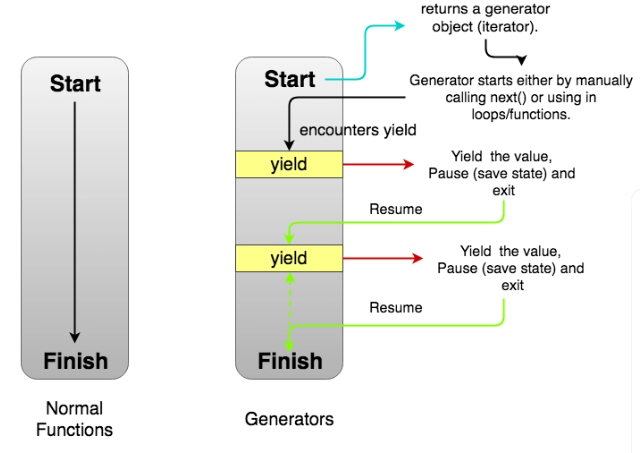

video link depecting the difference between Decorators and Generators

https://media.licdn.com/dms/image/C4E22AQEVl1UrEQd0AA/feedshare-shrink_2048_1536/0/1670422885977?e=1684972800&v=beta&t=pbhEOccj3jOWMqorlLFeUugKDQV9Ctw5msQzT86MRqY

In [15]:
# example 2.0

def squares(n):
    for i in range(n):
        return i**2

gen_obj = squares(10)
print(gen_obj)
print(gen_obj)
print(gen_obj)

# here return prints the same object again and again


0
0
0


In [16]:
# example 1.0

def generator():           # generator function
    yield "Hello"
    yield "how are you"
    yield "i am fine"
     
generator()               # generator object which is iterable (we can iterate over it to get sequence of values)

for i in generator():
    print(i)



Hello
how are you
i am fine


In [20]:
# example 2.1

def squares(n):
    for i in range(n):
        yield i**2

gen_obj = squares(10)
print(gen_obj) # 

print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))
print(next(gen_obj))

# generator iterates the next object


<generator object squares at 0x000002BBC7307E00>
0
1
4
9
16
25
36
49


In [27]:
def squares(n):
    for i in range(n):
        yield i**2

gen_obj = squares(10)
print(gen_obj)

for i in gen_obj:
    print(i)

<generator object squares at 0x000002BBC7305B10>
0
1
4
9
16
25
36
49
64
81


In [18]:
# example 3.0

def process_file(filename):
    with open(filename) as file:
        for line in file:
            processed_line = line.strip().upper() # does some processing on the line
            yield processed_line # yield the processed line 
            # there are 5 line in the file. 
            # so here 5 yield statement are created and are then itereted by the for loop outside the function
          
file_gen = process_file("abcd.txt")
for i in range(5):
    print(next(file_gen))


SHAUN
BRETT
MATHEW
MICHALINDIA IS MY COUNTRY..!!
CAPITAL CITY IS DELHI..!!


In [19]:
# example 4.0

# this looks like an iterator???

abc = (i for i in range(10))

print(next(abc))
print(next(abc))
print(next(abc))


0
1
2


In [6]:

abc = (i for i in range(10))

for j in abc:
    if j == 8:
        continue
        
    print(j)


0
1
2
3
4
5
6
7
9


In [ ]:

def fun():
    abc = (i for i in range(10))

    for j in abc:
        if j == 8:
            continue
        
        print(j)

fun()
   

# now this function seems to do the same job as iterator?????

In [ ]:
# Advantages of Generator Functions:

# 1. when compared with class level iterators, generators are very easy to use
# 2. Improves memory utilization and performance.
# 3. Generators are best suitable for reading data from large number of large files
# 4. Generators work great for web scraping and crawling.

In [ ]:
# Generators vs Normal Collections wrt Memory Utilization:


In [ ]:

# Normal Collection:

l=[x*x for x in range(10000000000000000)]
print(l[0])
# We will get MemoryError in this case because all these values are required to store in the memory.



In [7]:

# Generators:

g=(x*x for x in range(10000000000000000))
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))
print(next(g))
# Output: 0
# We won't get any MemoryError because the values won't be stored at the beginning

0
1
4
9
16
25
36
49


# Practice

In [ ]:
# Iterators (see the video again)

# An iterator in Python is an object that contains a countable number of elements that can be iterated upon.

In [9]:
# Define a list
my_list = [1, 2, 3, 4, 5]

# Create an iterator object
my_iterator = iter(my_list)

# Iterate over the elements using a loop
for item in my_iterator:
    print(item)

print(type(my_iterator))

1
2
3
4
5
<class 'list_iterator'>


In [10]:
my_iterator = iter(my_list)

print(next(my_iterator))  # Prints 1
print(next(my_iterator))  # Prints 2


1
2


In [11]:
nums = [7,8,9,5]

print(nums[3]) 

for i in nums:
    print(i)

# this can also be done using iterators

5
7
8
9
5


In [12]:
# let's see how

it = iter(nums)
print(it) # this prints the object of the iterator 

print(it.__next__()) # this gives the first value (same as index value)
print(it.__next__()) # this gives the second value


7
8


In [13]:
print(next(it)) # see we are getting the 3rd value here

9


In [14]:
for i in nums:
    print(i)

7
8
9
5


In [ ]:
# all these are inbuilt ojects

In [15]:
# what if you want to create your own iterator 

# i want to print the topten values. one by one

class TopTen:
    def __init__(self):
        self.num = 1
    def __iter__(self):
        return self
    
    def __next__(self): 
        if self.num <= 10:
            val = self.num
            self.num += 1

            return val
        else:
            raise StopIteration

values = TopTen()

print(values.__next__())

print(values.__next__())

print(next(values))

for i in values:
    print(i)

# when you want to create your own iterator you need two methods:
# 1. iter() -- gives you the object of iterator
# 2. next() -- gives you next value(object)



1
2
3
4
5
6
7
8
9
10


In [ ]:
# we use iterators to fetch one value at a time

# if we have a list of value. let's say 100 values. and if you want one by one value
# what makes sense is to use iterator


# there are small issues with the iterator:
# you need to get the iterator where you have to define those to functions next and iter
# we do't want to do that we want python to do that for us

# that's where generators comes into picture
# generators gives you iterator


In [13]:
# how to create a generator 

# yield is a special keyword which will make your function as a generator
# yield returns the value in the form of iterator

def topten():


    yield 5


values = topten()

print(values) # using yield insted of getting value 5. we got a object of generator


# we know if we want to fetch something from a iterator we use next

print(values.__next__()) # this gives 5

print(next(values)) 


<generator object topten at 0x000002403E7781A0>
5


In [14]:

def topten():


    yield 5


values = topten()

print(values) 

print(next(values)) 



<generator object topten at 0x000002403E7783B0>
5


In [6]:

# here we can write more than one yield 

def topten():
    yield 1
    yield 2
    yield 3
    yield 4
    yield 5


values = topten()

print(values.__next__())  # this gives first value
print(values.__next__())
print(next(values))

for i in values:
    print("in for",i)


# this how you can create generator by using one particular keyword that is yield
# 

1
2
3
in for 4
in for 5


In [ ]:
# We want to print topten perfect square

def topten():
    n = 1
    # to print perfect square we have to use loop
    # we will not be using for loop here. because indirectly for uses iterator

    while n <= 10:
        sq = n*n
        yield sq  # this almost same as return. but return will terminate the function.  this will not
        n += 1      


values = topten()
print(values)

for i  in values:
    print(i)



# why someone will use a generator
# let's say you are fetching 1000 records from a database
# all this 1000 records will be loaded in your memory
# we don't want that 
# also we want to work with one value at a time
# in that case we can use generator


In [ ]:
################################################################

In [ ]:
# iterable -
# iterator - 
# iteration - 

In [31]:
def square_generator(n):
    for i in range(n):
        yield i ** 2

# Using the generator to generate squares of numbers up to 5
squares = square_generator(5)

# Iterating through the generator to retrieve values
for square in squares:
    print(square)


0
1
4
9
16


In [36]:
def square_generator(n):
    for i in range(n):
        yield i ** 2

s = square_generator(4)

print(next(s))
print(next(s))
print(next(s))
print(next(s))


0
1
4
9


In [5]:
def squares(n):
    i=1
    while(i<=n):
        yield i**2
        i+=1
        
for i in squares(7):
    print(i)


1
4
9


In [ ]:
def squares(n):
    i=1
    while(i<=n):
        yield i**2
        i+=1
        
n = squares(7)

print(next(n))
print(next(n))
print(next(n))